In [4]:
#그래프 그릴때 기본 라이브러리
import numpy as np #  숫자연산처리(행렬연산), 그래픽연산
import pandas as pd #dataframe처리 단 대용량 처리는 최근에 spark로 처리함(hadoop에 100배 빠름)
import seaborn as sns #그래픽 이쁘게
import matplotlib.pyplot as plt # 그래프 라이브러리
from collections import Counter 
%matplotlib inline

In [5]:
#그래프에 한글적용하는 방법
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

https://data.census.gov/cedsci/

In [6]:
poverty_level = pd.read_csv('C:/Users/w/PercentagePeopleBelowPovertyLevel.csv', encoding='windows-1252')

In [7]:
poverty_level.tail(50) # tail 뒤에서 보여줌

,Geographic Area,City,poverty_rate
29279,WY,Ranchettes CDP,3.1
29280,WY,Rawlins city,15.7
29281,WY,Red Butte CDP,12.2
29282,WY,Reliance CDP,7.5
29283,WY,Riverside town,1.8
29284,WY,Riverton city,15.8
29285,WY,Robertson CDP,0
29286,WY,Rock River town,2.7
29287,WY,Rock Springs city,12.5
29288,WY,Rolling Hills town,0


In [8]:
poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [9]:
poverty_level.all

<bound method DataFrame.all of       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                  AL            Addison town         30.7
4                  AL              Akron town           42
...               ...                     ...          ...
29324              WY  Woods Landing-Jelm CDP         18.6
29325              WY            Worland city         15.3
29326              WY             Wright town          5.9
29327              WY              Yoder town          5.4
29328              WY           Y-O Ranch CDP            0

[29329 rows x 3 columns]>

In [10]:
poverty_level.poverty_rate.replace(['-'],0.0, inplace=True )

In [11]:
poverty_level.poverty_rate.dtype

dtype('O')

In [12]:
poverty_level.poverty_rate # float와 int가 섞여있음

0        78.8
1        29.1
2        25.5
3        30.7
4          42
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328       0
Name: poverty_rate, Length: 29329, dtype: object

In [13]:
poverty_level.poverty_rate = poverty_level.poverty_rate.astype(float) 
#float로 변경

In [14]:
poverty_level.poverty_rate.dtype

dtype('float64')

In [15]:
poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [16]:
area_list = list(poverty_level['Geographic Area'].unique())

In [17]:
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [18]:
#각주마다 빈곤율 평균값을 구함
area_poverty_ratio = []
for i in area_list:
    x = poverty_level[poverty_level['Geographic Area']== i]
    print(x)
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    print(area_poverty_rate)
    area_poverty_ratio.append(area_poverty_rate)

    Geographic Area               City  poverty_rate
0                AL         Abanda CDP          78.8
1                AL     Abbeville city          29.1
2                AL    Adamsville city          25.5
3                AL       Addison town          30.7
4                AL         Akron town          42.0
..              ...                ...           ...
580              AL      Woodland town          26.6
581              AL     Woodstock town          13.5
582              AL     Woodville town          25.9
583              AL  Yellow Bluff town          44.1
584              AL          York city          46.8

[585 rows x 3 columns]
20.611794871794878
    Geographic Area                       City  poverty_rate
585              AK                  Adak city          39.3
586              AK                Akhiok city          40.5
587              AK               Akiachak CDP          26.1
588              AK                 Akiak city          31.3
589             

      Geographic Area             City  poverty_rate
26723              VA    Abingdon town          17.5
26724              VA     Accomac town           9.4
26725              VA       Adwolf CDP          12.4
26726              VA     Alberta town          19.7
26727              VA  Alexandria city           8.3
...               ...              ...           ...
27311              VA      Wyndham CDP           0.6
27312              VA  Wytheville town          23.7
27313              VA    Yogaville CDP          21.2
27314              VA    Yorkshire CDP          19.1
27315              VA     Yorktown CDP           8.5

[593 rows x 3 columns]
14.58583473861719
      Geographic Area                  City  poverty_rate
27316              WA         Aberdeen city          23.3
27317              WA  Aberdeen Gardens CDP           1.5
27318              WA              Acme CDP         100.0
27319              WA              Addy CDP         100.0
27320              WA           

In [19]:
data = pd.DataFrame({'area_list': area_list, 
                     'area_poverty_ratio':area_poverty_ratio})

In [20]:
data

,area_list,area_poverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_list           51 non-null     object 
 1   area_poverty_ratio  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [22]:
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values

In [23]:
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30],
      dtype=int64)

In [24]:
sorted_data= data.reindex(new_index)

In [25]:
sorted_data

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


In [26]:
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data= data.reindex(new_index)
sorted_data

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


Text(0.5, 1.0, '미국의 각주마다 빈곤율')

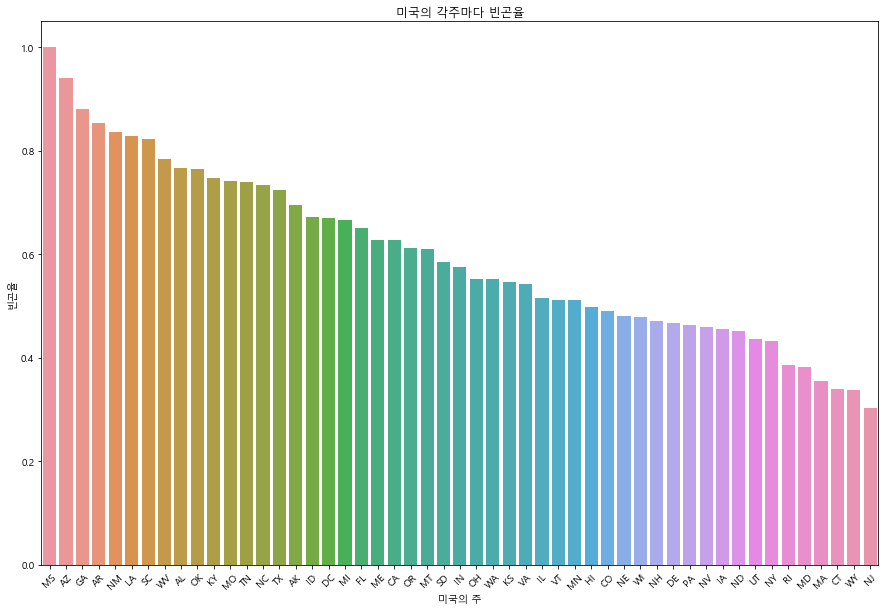

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation =45)
plt.xlabel('미국의 주')
plt.ylabel('빈곤율')
plt.title('미국의 각주마다 빈곤율')

In [28]:
highScool = pd.read_csv('C:/Users/w/PercentOver25CompletedHighSchool.csv',
                        encoding='windows-1252')

In [29]:
highScool.head(20)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
5,AL,Alabaster city,89.3
6,AL,Albertville city,72.7
7,AL,Alexander City city,78.1
8,AL,Alexandria CDP,88.8
9,AL,Aliceville city,74.3


In [30]:
highScool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [31]:
highScool.corr() #-이 나오면 수치가 없음

""


In [32]:
highScool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
30.6       1
8.1        1
17.9       1
22.4       1
15.8       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [33]:
highScool.percent_completed_hs.all

<bound method Series.all of 0        21.2
1        69.1
2        78.9
3        81.4
4        68.6
         ... 
29324     100
29325    85.6
29326    89.2
29327    79.4
29328     100
Name: percent_completed_hs, Length: 29329, dtype: object>

In [34]:
highScool.percent_completed_hs = highScool.percent_completed_hs.astype(float)

ValueError: could not convert string to float: '-'

In [35]:
highScool.percent_completed_hs.replace(['-'],0.0, inplace=True )

In [36]:
highScool.percent_completed_hs = highScool.percent_completed_hs.astype(float)

In [37]:
highScool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [38]:
area_list = list(highScool['Geographic Area'].unique())

In [39]:
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [40]:
area_highscool_ratio = []
for i in area_list:
    x = highScool[highScool['Geographic Area']== i]
    print(x)
    area_highscool_rate = sum(x.percent_completed_hs)/len(x)
    area_highscool_ratio.append(area_highscool_rate)
    print(area_highscool_ratio)

    Geographic Area               City  percent_completed_hs
0                AL         Abanda CDP                  21.2
1                AL     Abbeville city                  69.1
2                AL    Adamsville city                  78.9
3                AL       Addison town                  81.4
4                AL         Akron town                  68.6
..              ...                ...                   ...
580              AL      Woodland town                  86.4
581              AL     Woodstock town                  89.5
582              AL     Woodville town                  77.7
583              AL  Yellow Bluff town                  62.0
584              AL          York city                  77.1

[585 rows x 3 columns]
[80.16341880341879]
    Geographic Area                       City  percent_completed_hs
585              AK                  Adak city                  93.4
586              AK                Akhiok city                  62.5
587              

      Geographic Area                 City  percent_completed_hs
26277              UT          Alpine city                  97.4
26278              UT            Alta town                 100.0
26279              UT        Altamont town                  93.4
26280              UT           Alton town                 100.0
26281              UT          Amalga town                  85.1
...               ...                  ...                   ...
26597              UT       Wolf Creek CDP                  92.3
26598              UT         Woodland CDP                 100.0
26599              UT  Woodland Hills city                  97.6
26600              UT        Woodruff town                  97.3
26601              UT     Woods Cross city                  97.4

[325 rows x 3 columns]
[80.16341880341879, 80.09802816901407, 79.21818181818183, 79.94953789279104, 80.82463863337709, 88.92620087336242, 91.5916666666667, 88.51948051948051, 89.3, 85.45762527233121, 78.63444976076555, 

In [41]:
data = pd.DataFrame({'area_list': area_list, 
                     'area_highscool_ratio':area_highscool_ratio})
data

,area_list,area_highscool_ratio
0,AL,80.163419
1,AK,80.098028
2,AZ,79.218182
3,AR,79.949538
4,CA,80.824639
5,CO,88.926201
6,CT,91.591667
7,DE,88.519481
8,DC,89.300000
9,FL,85.457625


In [42]:
new_index = (data['area_highscool_ratio'].sort_values(ascending=False)).index.values
sorted_data1= data.reindex(new_index)
sorted_data1

,area_list,area_highscool_ratio
21,MA,92.028455
11,HI,91.665563
6,CT,91.591667
19,ME,91.430769
29,NH,90.711340
32,NY,90.537960
30,NJ,90.520550
49,WI,90.263964
26,MT,89.992603
45,VT,89.976860


Text(0.5, 1.0, '미국의 각주마다 졸업율')

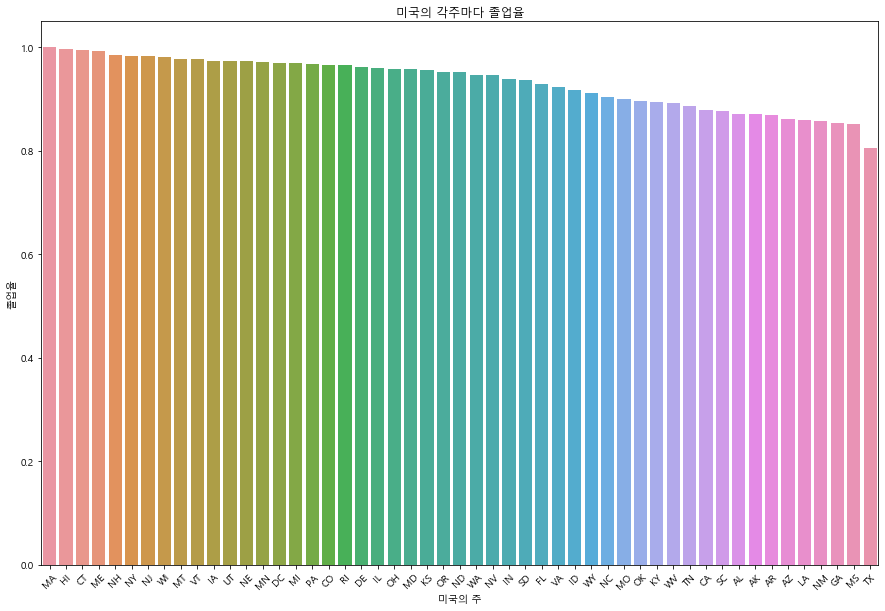

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data1['area_list'], y=sorted_data1['area_highscool_ratio'])
plt.xticks(rotation =45)
plt.xlabel('미국의 주')
plt.ylabel('졸업율')
plt.title('미국의 각주마다 졸업율')

In [49]:
sorted_data

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207
18,LA,0.829176
40,SC,0.822249
48,WV,0.784185
0,AL,0.766687
36,OK,0.764235


In [46]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])

In [157]:
sorted_data

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207
18,LA,0.829176
40,SC,0.822249
48,WV,0.784185
0,AL,0.766687
36,OK,0.764235


In [44]:
sorted_data1['area_highscool_ratio'] = sorted_data1['area_highscool_ratio'] / max(sorted_data1['area_highscool_ratio'])

In [45]:
sorted_data1

,area_list,area_highscool_ratio
21,MA,1.000000
11,HI,0.996057
6,CT,0.995254
19,ME,0.993505
29,NH,0.985688
32,NY,0.983804
30,NJ,0.983615
49,WI,0.980827
26,MT,0.977878
45,VT,0.977707


In [160]:
data = pd.concat([sorted_data,sorted_data1['area_highscool_ratio']],axis=1)

In [161]:
data

,area_list,area_poverty_ratio,area_highscool_ratio
0,AL,0.766687,0.871072
1,AK,0.694778,0.870362
2,AZ,0.939884,0.860801
3,AR,0.854151,0.868748
4,CA,0.628188,0.878257
5,CO,0.490539,0.966290
6,CT,0.339883,0.995254
7,DE,0.467033,0.961871
8,DC,0.669537,0.970352
9,FL,0.651259,0.928600


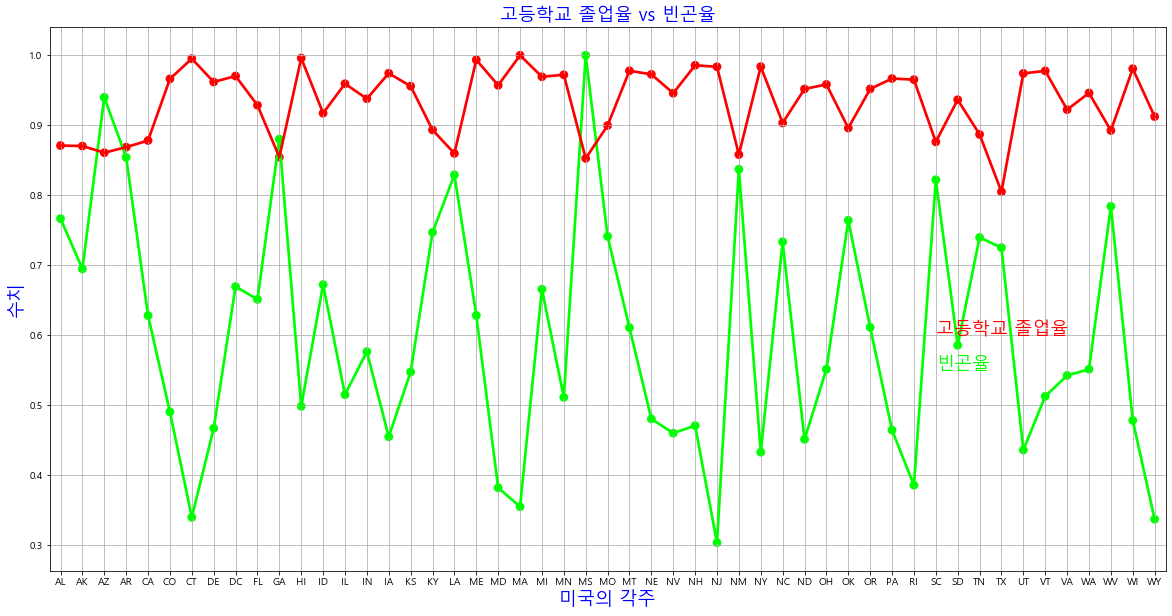

In [168]:
f, ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highscool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'고등학교 졸업율',color='red',fontsize=18, style='italic')
plt.text(40,0.55,'빈곤율',color='lime',fontsize=18, style='italic')
plt.xlabel('미국의 각주',fontsize=18, color='blue')
plt.ylabel('수치',fontsize=18, color='blue')
plt.title('고등학교 졸업율 vs 빈곤율', fontsize=18, color='blue')
plt.grid()

C:\Users\w\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


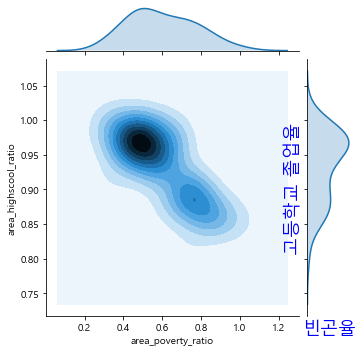

In [169]:
g=sns.jointplot(data.area_poverty_ratio,data.area_highscool_ratio, kind='kde',size=5)
plt.xlabel('빈곤율',fontsize=18, color='blue')
plt.ylabel('고등학교 졸업율',fontsize=18, color='blue')
plt.savefig('graph.png')#그래프 저장
plt.show()

C:\Users\w\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


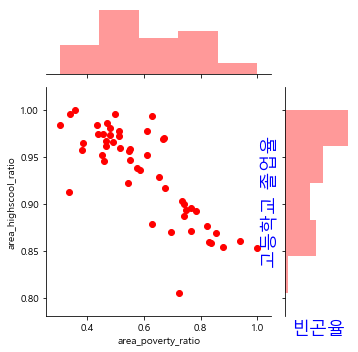

In [171]:
g=sns.jointplot(data.area_poverty_ratio,data.area_highscool_ratio, data=data, size=5, ratio=3, color='r')
plt.xlabel('빈곤율',fontsize=18, color='blue')
plt.ylabel('고등학교 졸업율',fontsize=18, color='blue')
plt.show()